# Identify and gather data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "Customer_Churn_Data_Large.xlsx"
all_sheets = pd.read_excel(file_path, sheet_name=None)

In [4]:
all_sheets.keys()

dict_keys(['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status'])

In [5]:
main_churn = all_sheets['Customer_Demographics']
Transaction_History = all_sheets['Transaction_History']
Customer_Service = all_sheets['Customer_Service']
Online_Activity = all_sheets['Online_Activity']
Churn_Status = all_sheets['Churn_Status']

In [6]:
main_churn.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [7]:
Transaction_History.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


Removing the columns TransactionID and TransactionDate as they don't have any significant impact on churn status

In [8]:
Transaction_History.drop(columns=["TransactionID", "TransactionDate"],inplace=True)

In [9]:
Customer_Service.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


Removing the columns InteractionID and InteractionDate as they also don't have any significant impact on churn status

In [10]:
Customer_Service.drop(columns=["InteractionID","InteractionDate"],inplace=True)

In [11]:
Online_Activity.head()

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website


In [12]:
Churn_Status.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


# Performing EDA

In [13]:
# Count number of interactions per customer
transactions_per_customer = (
    Transaction_History
    .groupby('CustomerID')
    .size()
    .reset_index(name='Number_of_Transaction')
)

In [14]:
# Sum total amount spent by each customer
total_spent_per_customer = (
    Transaction_History
    .groupby('CustomerID')['AmountSpent']
    .sum()
    .reset_index(name='total_amount_spent')
)

In [15]:
unresolved_count = (
    Customer_Service[Customer_Service['ResolutionStatus'] != 'Resolved']
    .groupby('CustomerID')
    .size()
    .reset_index(name='Unresolved_Interactions')
)

In [16]:
resolved_count = (
    Customer_Service[Customer_Service['ResolutionStatus'] == 'Resolved']
    .groupby('CustomerID')
    .size()
    .reset_index(name='Resolved_Interactions')
)

In [17]:
# Count number of interactions per customer
interactions_per_customer = (
    Customer_Service
    .groupby('CustomerID')
    .size()
    .reset_index(name='Number_of_Interactions')
)

In [18]:
main_churn = main_churn.merge(
    unresolved_count, on='CustomerID', how='left'
)

main_churn = main_churn.merge(
    resolved_count, on='CustomerID', how='left'
)

main_churn = main_churn.merge(
    interactions_per_customer,
    on='CustomerID',
    how='left'
)

main_churn = main_churn.merge(
    transactions_per_customer,
    on='CustomerID',
    how='left'
)

main_churn = main_churn.merge(
    total_spent_per_customer,
    on='CustomerID',
    how='left'
)

main_churn = main_churn.merge(
    Online_Activity[['CustomerID', 'LoginFrequency']],
    on='CustomerID',
    how='left'
)

main_churn = main_churn.merge(
    Churn_Status,
    on='CustomerID',
    how='left'
)

In [19]:
main_churn.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,Unresolved_Interactions,Resolved_Interactions,Number_of_Interactions,Number_of_Transaction,total_amount_spent,LoginFrequency,ChurnStatus
0,1,62,M,Single,Low,NaN,1.0,1.0,1,416.50,34,0
1,2,65,M,Married,Low,NaN,1.0,1.0,7,1547.42,5,1
2,3,18,M,Single,Low,NaN,1.0,1.0,6,1702.98,3,0
3,4,21,M,Widowed,Low,1.0,1.0,2.0,5,917.29,2,0
4,5,21,M,Divorced,Medium,NaN,NaN,NaN,8,2001.49,41,0


In [20]:
main_churn.isnull().sum()

CustomerID                   0
Age                          0
Gender                       0
MaritalStatus                0
IncomeLevel                  0
Unresolved_Interactions    589
Resolved_Interactions      552
Number_of_Interactions     332
Number_of_Transaction        0
total_amount_spent           0
LoginFrequency               0
ChurnStatus                  0
dtype: int64

Here, the reason behind NaN values in Unresolved, Resolved and Total Interactions is that few customers have interacted and few not. Apart from that, it might happen that they don't have any unresolved or resolved interactions. Hence filling these values with 0.

In [21]:
main_churn = main_churn.fillna(0)

In [22]:
main_churn.isnull().sum()

CustomerID                 0
Age                        0
Gender                     0
MaritalStatus              0
IncomeLevel                0
Unresolved_Interactions    0
Resolved_Interactions      0
Number_of_Interactions     0
Number_of_Transaction      0
total_amount_spent         0
LoginFrequency             0
ChurnStatus                0
dtype: int64

In [23]:
main_churn.duplicated().isnull().sum()

np.int64(0)

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Unresolved_Interactions'}>],
       [<Axes: title={'center': 'Resolved_Interactions'}>,
        <Axes: title={'center': 'Number_of_Interactions'}>,
        <Axes: title={'center': 'Number_of_Transaction'}>],
       [<Axes: title={'center': 'total_amount_spent'}>,
        <Axes: title={'center': 'LoginFrequency'}>,
        <Axes: title={'center': 'ChurnStatus'}>]], dtype=object)

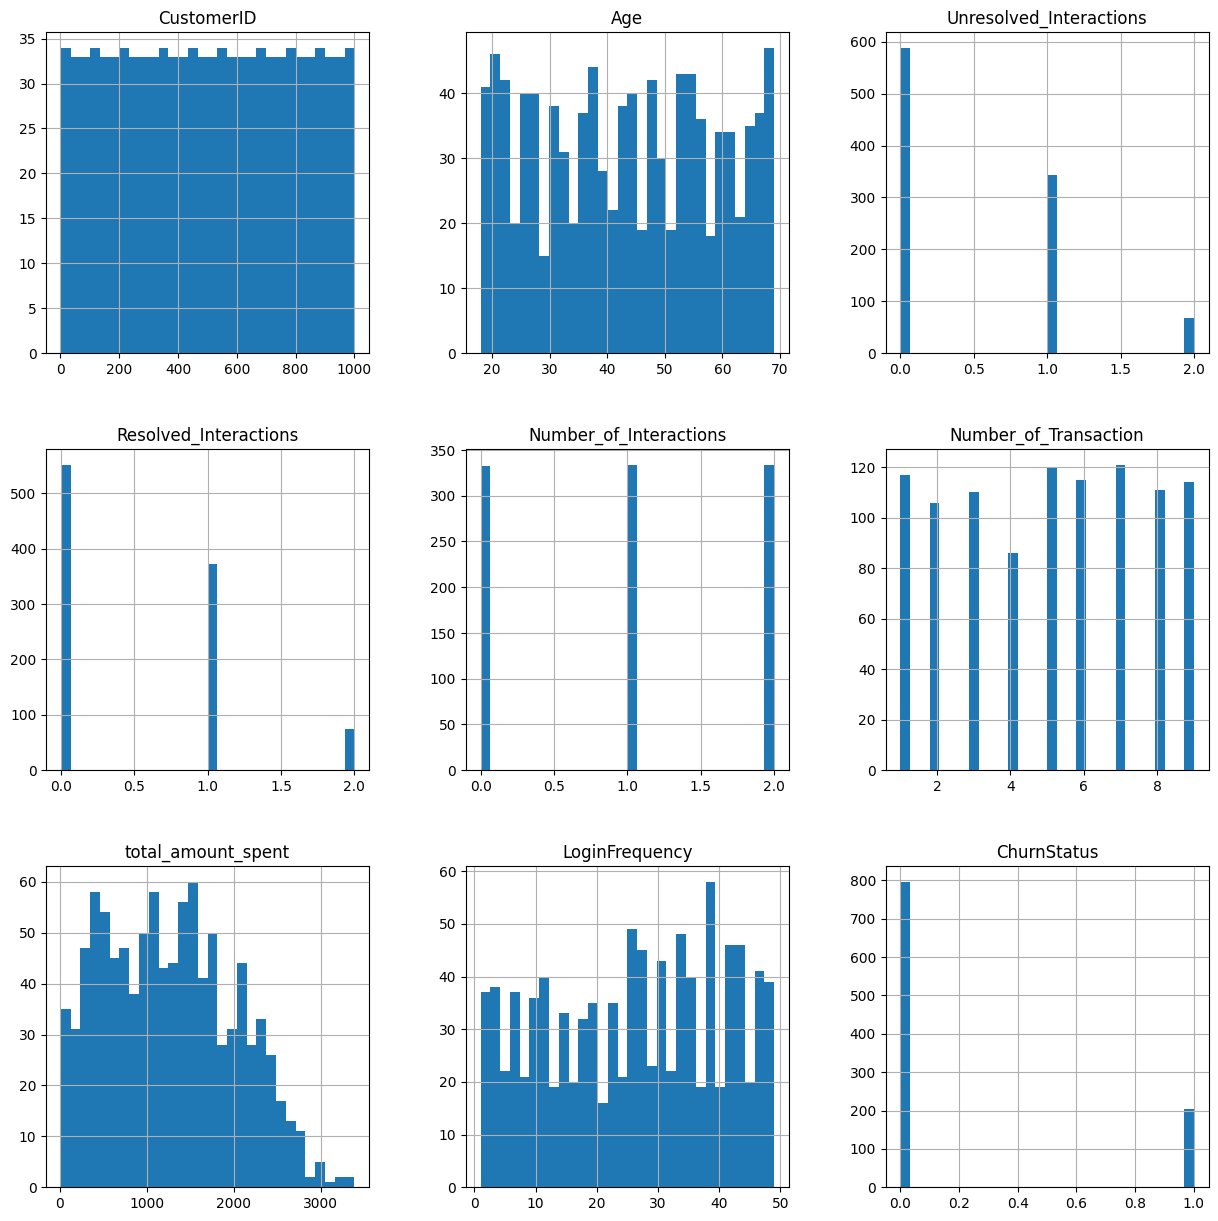

In [24]:
# ploting the histogram
main_churn.hist(bins=30, figsize=(15,15))

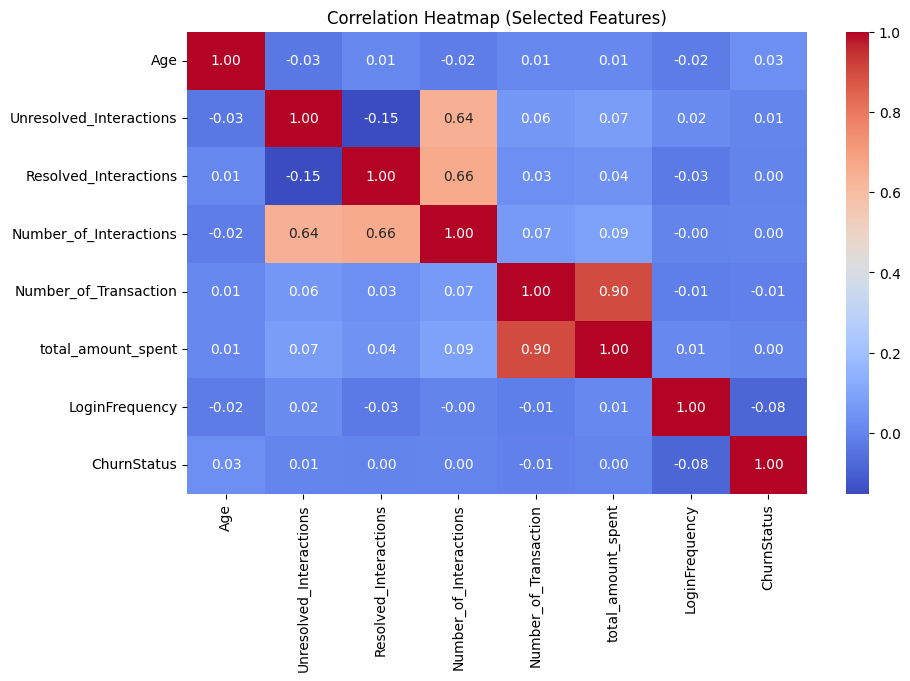

In [25]:
cols = [
    'Age',
    'Unresolved_Interactions',
    'Resolved_Interactions',
    'Number_of_Interactions',
    'Number_of_Transaction',
    'total_amount_spent',
    'LoginFrequency',
    'ChurnStatus'
]

corr_matrix = main_churn[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Selected Features)')
plt.show()

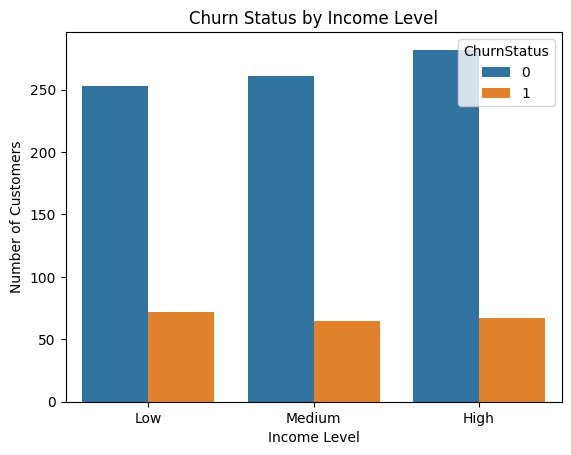

In [26]:
sns.countplot(
    x='IncomeLevel',
    hue='ChurnStatus',
    data=main_churn
)

plt.title("Churn Status by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Number of Customers")
plt.show()

The analysis indicates a comparatively higher churn rate among customers in the low-income group, whereas customers in the high-income group exhibit stronger retention.

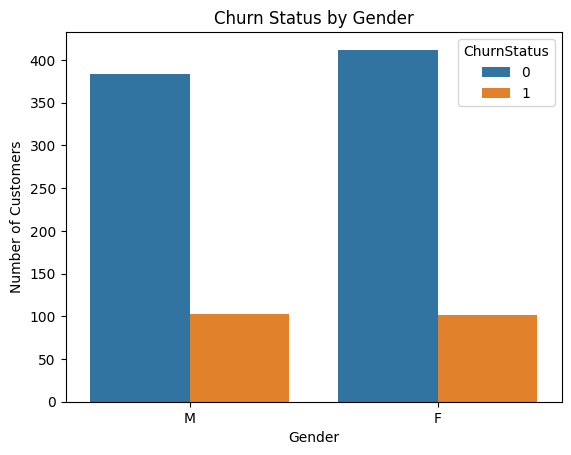

In [27]:
sns.countplot(
    x='Gender',
    hue='ChurnStatus',
    data=main_churn
)

plt.title("Churn Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

The analysis indicates a comparatively higher churn rate for males, whereas females exhibit stronger retention.

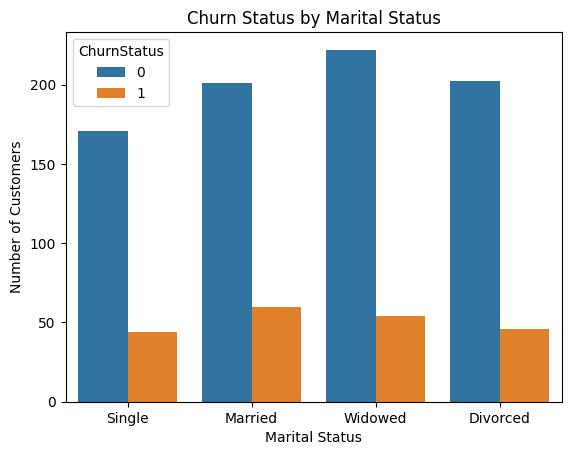

In [28]:
sns.countplot(
    x='MaritalStatus',
    hue='ChurnStatus',
    data=main_churn
)

plt.title("Churn Status by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.show()

The analysis indicates a comparatively higher churn rate for married customers, whereas widows exhibit stronger retention.

In [29]:
# Sum interactions grouped by churn
interactions_summary = main_churn.groupby('ChurnStatus')['Number_of_Interactions'].sum().reset_index()

interactions_summary

,ChurnStatus,Number_of_Interactions
0,0,796.0
1,1,206.0


C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_10528\782225794.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


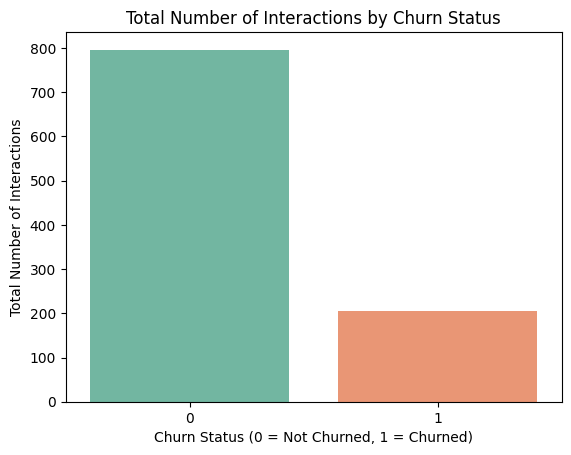

In [30]:
sns.barplot(
    x='ChurnStatus',
    y='Number_of_Interactions',
    data=interactions_summary,
    palette='Set2'
)

plt.title("Total Number of Interactions by Churn Status")
plt.xlabel("Churn Status (0 = Not Churned, 1 = Churned)")
plt.ylabel("Total Number of Interactions")
plt.show()

In [31]:
# Aggregate totals per churn
interaction_summary = main_churn.groupby('ChurnStatus')[['Resolved_Interactions', 'Unresolved_Interactions']].sum().reset_index()

# Melt to long format for seaborn
interaction_melted = interaction_summary.melt(
    id_vars='ChurnStatus',
    value_vars=['Resolved_Interactions', 'Unresolved_Interactions'],
    var_name='InteractionType',
    value_name='Total_Interactions'
)

interaction_melted

,ChurnStatus,InteractionType,Total_Interactions
0,0,Resolved_Interactions,416.0
1,1,Resolved_Interactions,107.0
2,0,Unresolved_Interactions,380.0
3,1,Unresolved_Interactions,99.0


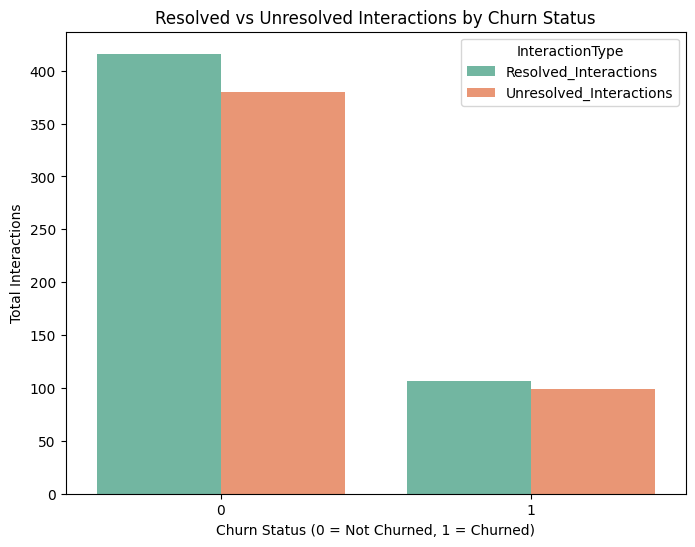

In [32]:
plt.figure(figsize=(8,6))

sns.barplot(
    x='ChurnStatus',
    y='Total_Interactions',
    hue='InteractionType',
    data=interaction_melted,
    palette='Set2'
)

plt.title("Resolved vs Unresolved Interactions by Churn Status")
plt.xlabel("Churn Status (0 = Not Churned, 1 = Churned)")
plt.ylabel("Total Interactions")
plt.show()

In [33]:
zero_interactions = (
    main_churn[main_churn['Number_of_Interactions'] == 0]
    .groupby('ChurnStatus')
    .size()
    .reset_index(name='Zero_Interaction_Customers')
)

zero_interactions


,ChurnStatus,Zero_Interaction_Customers
0,0,271
1,1,61


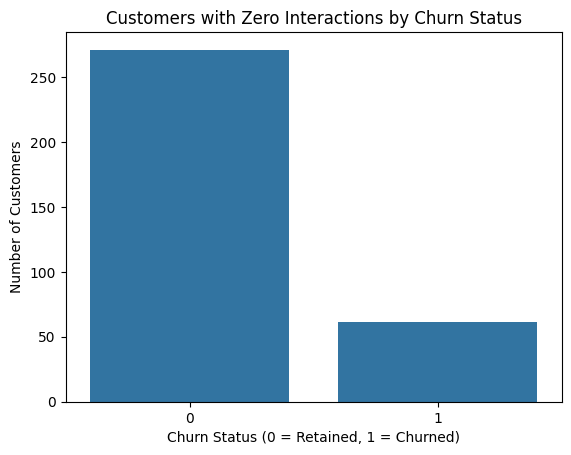

In [34]:
sns.barplot(
    data=zero_interactions,
    x='ChurnStatus',
    y='Zero_Interaction_Customers'
)
plt.title('Customers with Zero Interactions by Churn Status')
plt.xlabel('Churn Status (0 = Retained, 1 = Churned)')
plt.ylabel('Number of Customers')
plt.show()

In [35]:
product_count = (
    Transaction_History
    .groupby(['CustomerID', 'ProductCategory'])
    .size()
    .reset_index(name='Count')
)

product_count.head()

,CustomerID,ProductCategory,Count
0,1,Electronics,1
1,2,Clothing,2
2,2,Electronics,3
3,2,Furniture,1
4,2,Groceries,1


In [36]:
# Merge churn status into transaction history
transaction = Transaction_History.merge(
    Churn_Status[['CustomerID', 'ChurnStatus']],
    on='CustomerID',
    how='left'  # keeps all rows in transaction_history
)

# Check result
transaction.head()

,CustomerID,AmountSpent,ProductCategory,ChurnStatus
0,1,416.50,Electronics,0
1,2,54.96,Clothing,1
2,2,197.50,Electronics,1
3,2,101.31,Furniture,1
4,2,397.37,Clothing,1


In [37]:
# Count number of rows per product category per churn status
product_churn_summary = (
    transaction
    .groupby(['ChurnStatus', 'ProductCategory'])
    .size()
    .reset_index(name='CustomerCount')
)

product_churn_summary

,ChurnStatus,ProductCategory,CustomerCount
0,0,Books,844
1,0,Clothing,813
2,0,Electronics,776
3,0,Furniture,779
4,0,Groceries,820
5,1,Books,197
6,1,Clothing,187
7,1,Electronics,225
8,1,Furniture,213
9,1,Groceries,200


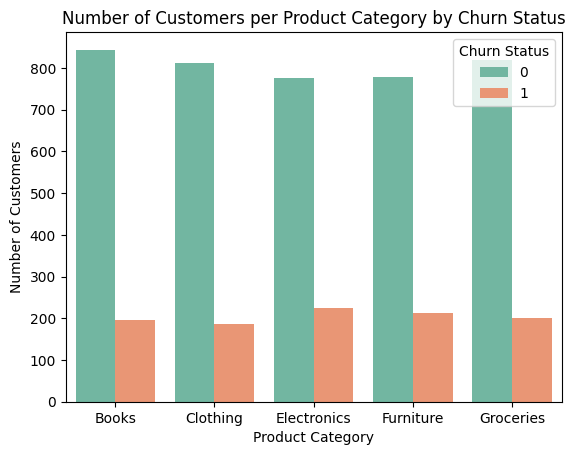

In [38]:
sns.barplot(
    x='ProductCategory',
    y='CustomerCount',
    hue='ChurnStatus',
    data=product_churn_summary,
    palette='Set2'
)

plt.title("Number of Customers per Product Category by Churn Status")
plt.xlabel("Product Category")
plt.ylabel("Number of Customers")
plt.legend(title="Churn Status")
plt.show()

The analysis indicates a comparatively higher churn rate for customers buying electronics item, whereas customers buying books exhibit stronger retention.

In [39]:
# Sum total transactions and interactions by churn status
churn_summary = main_churn.groupby('ChurnStatus')[['Number_of_Transaction', 'Number_of_Interactions']].sum().reset_index()

churn_summary

,ChurnStatus,Number_of_Transaction,Number_of_Interactions
0,0,4032,796.0
1,1,1022,206.0


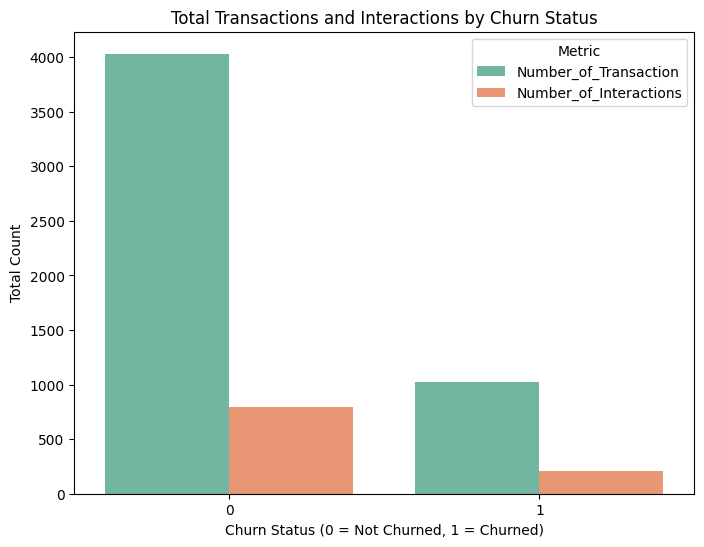

In [40]:
plt.figure(figsize=(8,6))

# Melt data for seaborn
churn_summary_melted = churn_summary.melt(id_vars='ChurnStatus', 
                                          value_vars=['Number_of_Transaction', 'Number_of_Interactions'],
                                          var_name='Metric', 
                                          value_name='Total')

sns.barplot(
    x='ChurnStatus',
    y='Total',
    hue='Metric',
    data=churn_summary_melted,
    palette='Set2'
)

plt.title("Total Transactions and Interactions by Churn Status")
plt.xlabel("Churn Status (0 = Not Churned, 1 = Churned)")
plt.ylabel("Total Count")
plt.show()

In [41]:
churn_summary['Interaction_Percentage'] = (
    churn_summary['Number_of_Interactions'] /
    churn_summary['Number_of_Transaction']
) * 100

In [42]:
churn_summary

,ChurnStatus,Number_of_Transaction,Number_of_Interactions,Interaction_Percentage
0,0,4032,796.0,19.742063
1,1,1022,206.0,20.156556


The results indicate that the interaction-to-transaction ratio is approximately 20% for both churned and non-churned customers. This similarity suggests that customer interactions have a minimal impact on churn status. Therefore, the ‘Number_of_Interactions’ feature can be considered for removal from the main dataset.

In [43]:
# Sum total amount per product category per churn status
product_amount_summary = (
    transaction
    .groupby(['ProductCategory', 'ChurnStatus'])['AmountSpent']
    .sum()
    .reset_index(name='AmountSpent')
)

product_amount_summary

,ProductCategory,ChurnStatus,AmountSpent
0,Books,0,210120.13
1,Books,1,49444.86
2,Clothing,0,205690.67
3,Clothing,1,46760.03
4,Electronics,0,192660.32
5,Electronics,1,56479.47
6,Furniture,0,193183.37
7,Furniture,1,51602.45
8,Groceries,0,206543.22
9,Groceries,1,54590.43


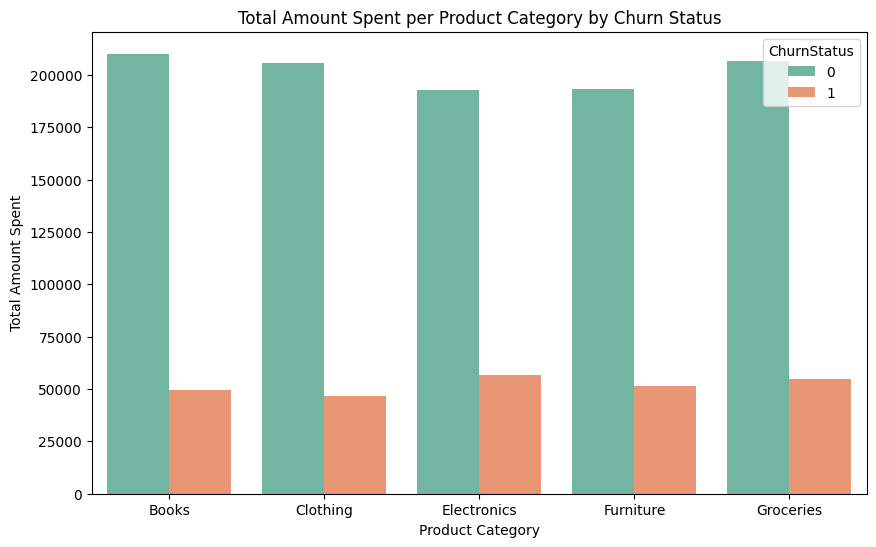

In [44]:
plt.figure(figsize=(10,6))

sns.barplot(
    x='ProductCategory',
    y='AmountSpent',
    hue='ChurnStatus',
    data=product_amount_summary,
    palette='Set2'
)

plt.title("Total Amount Spent per Product Category by Churn Status")
plt.xlabel("Product Category")
plt.ylabel("Total Amount Spent")
plt.show()

In [45]:
# Sum total_amount_spent for each churn status
amount_summary = main_churn.groupby('ChurnStatus')['total_amount_spent'].sum().reset_index()

amount_summary

,ChurnStatus,total_amount_spent
0,0,1008197.71
1,1,258877.24


C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_10528\1108446786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


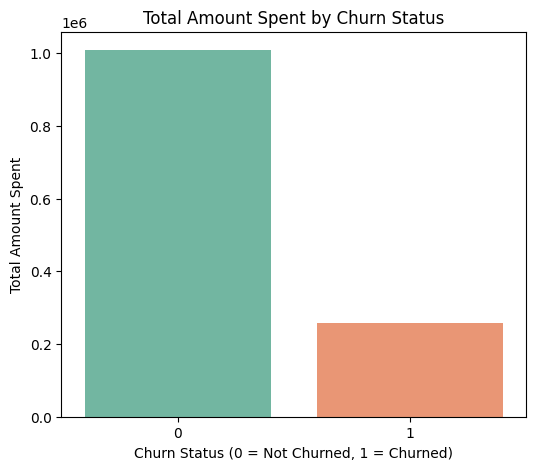

In [46]:
plt.figure(figsize=(6,5))

sns.barplot(
    x='ChurnStatus',
    y='total_amount_spent',
    data=amount_summary,
    palette='Set2'
)

plt.title("Total Amount Spent by Churn Status")
plt.xlabel("Churn Status (0 = Not Churned, 1 = Churned)")
plt.ylabel("Total Amount Spent")
plt.show()

The analysis indicates a comparatively higher churn rate for customers spending to buy electronics item, whereas exhibit stronger retention when customer spends more for books.

# Clean and preprocess the data

Dropping the columns which have least significance on churn status

In [47]:
main_churn.drop(
    columns=['CustomerID','Unresolved_Interactions','Resolved_Interactions','Age','Gender','MaritalStatus'],
    inplace=True
)

In [49]:
main_churn.drop(
    columns=['IncomeLevel'],
    inplace=True
)

In [50]:
main_churn.head()

,Number_of_Interactions,Number_of_Transaction,total_amount_spent,LoginFrequency,ChurnStatus
0,1.0,1,416.50,34,0
1,1.0,7,1547.42,5,1
2,1.0,6,1702.98,3,0
3,2.0,5,917.29,2,0
4,0.0,8,2001.49,41,0


In [51]:
main_churn.shape

(1000, 5)

In [52]:
main_churn.corr()

,Number_of_Interactions,Number_of_Transaction,total_amount_spent,LoginFrequency,ChurnStatus
Number_of_Interactions,1.000000,0.065876,0.089723,-0.002514,0.004841
Number_of_Transaction,0.065876,1.000000,0.898256,-0.013985,-0.008598
total_amount_spent,0.089723,0.898256,1.000000,0.012015,0.001324
LoginFrequency,-0.002514,-0.013985,0.012015,1.000000,-0.081615
ChurnStatus,0.004841,-0.008598,0.001324,-0.081615,1.000000


This table represents the final dataset to be used for subsequent analysis and model development.

# Building a machine learning model

In [53]:
x = main_churn.iloc[:,:-1]
y = main_churn['ChurnStatus']

In [54]:
y.value_counts()

ChurnStatus
0    796
1    204
Name: count, dtype: int64

In [56]:
from imblearn.over_sampling import RandomOverSampler

In [57]:
rus = RandomOverSampler()
rus_x, rus_y = rus.fit_resample(x,y)

In [58]:
rus_y.value_counts()

ChurnStatus
0    796
1    796
Name: count, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [60]:
x_train, x_test, y_train, y_test = train_test_split(rus_x,rus_y,test_size=0.2,random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [62]:
models = {
    "Random Forest":RandomForestClassifier()
}

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
------------------------------------------
Model performance for Test set
- Accuracy: 0.8715
- F1 score: 0.8713
- Precision: 0.8497
- Recall: 0.9074
- Roc Auc Score: 0.8709




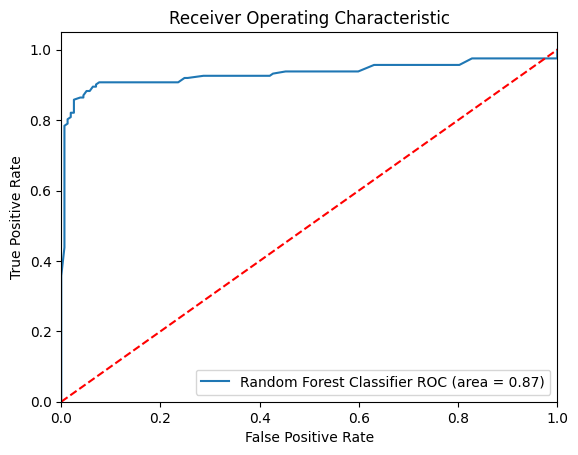

In [63]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average = 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average = 'weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

    print('------------------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')

auc_models ={
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=100, min_samples_split=2, max_features=5, max_depth=10),
    'auc': model_test_rocauc_score
}


    
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (auc_models['label'], auc_models['auc']))


plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Good Job!

In [69]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [70]:
main_churn = pd.DataFrame({
    'Number_of_Interactions': [1.0],
    'Number_of_Transaction': [1],
    'total_amount_spent': [416.50],
    'LoginFrequency': [34]
})




prediction = model.predict(main_churn)

In [71]:
prediction

array([0])